# Exploratory Data Analysis in R

Whenever we are working with a dataset for statistical analysis it is important to make sure the data we have is complete and accurate, and also to get a better understanding of what the data is. In this tutorial we will introduce packages and strategies to import, tidy, transform and visualise data before undergoing a statistical analysis.

## Loading packages

First we need to load the packages that we will require for our project, which in this case is exploratory data analysis. For this we will use the **tidyverse** package, a collection of R packages designed to help you import, tidy, transform and visualise data. The **tidyverse** package includes packages such as **readr** for importing .csv and other files, **tidyr** for tidying data, **dplyr** for transforming data and **ggplot2** for visualising data. If you don't have **tidyverse** installed on your computer you can do so by typing *install.packages("tidyverse")* in your R console, if you already have tidyverse installed then you can load it with the library(tidyverse) command: 

In [5]:
library(tidyverse)


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


# Loading and understanding the data

Loading data into R from your personal computer will depend on the type of file that you wish to load. For .csv and .txt files the **readr** package can help you load your data. You can find more information about the **readr** package by clicking this link __[readr](https://readr.tidyverse.org)__. For .xls and .xlsx files you can use the **readxl** package to load your data. More information on about the **readxl** package can be found at this link __[readxl](https://readxl.tidyverse.org/)__. For this tutorial we will be using datasets from the **datasets** package in R. To see what datasets are available in the **datasets** package type *library(help = "datasets")* in your console in R.

In [10]:
data("mtcars") #load the mtcars dataset

The first 3 functions we will use to get an understanding of the dataset are the head(), summary(), and str() functions. head() provides the first few observations of the dataset, sumary() gives some summary statistics for the columns of the dataset and str() provides the structure of the dataset including the data type for each column.

In [12]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [11]:
summary(mtcars)

      mpg             cyl             disp             hp       
 Min.   :10.40   Min.   :4.000   Min.   : 71.1   Min.   : 52.0  
 1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.8   1st Qu.: 96.5  
 Median :19.20   Median :6.000   Median :196.3   Median :123.0  
 Mean   :20.09   Mean   :6.188   Mean   :230.7   Mean   :146.7  
 3rd Qu.:22.80   3rd Qu.:8.000   3rd Qu.:326.0   3rd Qu.:180.0  
 Max.   :33.90   Max.   :8.000   Max.   :472.0   Max.   :335.0  
      drat             wt             qsec             vs        
 Min.   :2.760   Min.   :1.513   Min.   :14.50   Min.   :0.0000  
 1st Qu.:3.080   1st Qu.:2.581   1st Qu.:16.89   1st Qu.:0.0000  
 Median :3.695   Median :3.325   Median :17.71   Median :0.0000  
 Mean   :3.597   Mean   :3.217   Mean   :17.85   Mean   :0.4375  
 3rd Qu.:3.920   3rd Qu.:3.610   3rd Qu.:18.90   3rd Qu.:1.0000  
 Max.   :4.930   Max.   :5.424   Max.   :22.90   Max.   :1.0000  
       am              gear            carb      
 Min.   :0.0000   Min.   :3.000  

In [13]:
str(mtcars)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


Sometimes we will need to change the data type of some columns before conducting our analysis. For example from numeric to integer, from numeric to logical (in the case of 0,1 variables) or setting up a categorical variable as a factor with multiple levels. This can be done using as.integer(), as.logical(), as.factor(), etc.

In [15]:
#Example of changing data type of a column
mtcars$cyl <- as.integer(mtcars$cyl)

str(mtcars)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : int  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


# Missing data

Sometimes we need to work with datasets with missing or incomplete data. When this is the case, we need to decide what to do with the observations that include missing values. In this section we will go through 2 ways that we can deal with missing values in our data, removing the observations containing missing values or substituting values that are a "resonable guess" for the missing data such as the mean, median or mode of the column. We will be using the airquality dataset contained in the datasets package in R.

In [19]:
data("airquality") #load the airquality dataset

summary(airquality)

     Ozone           Solar.R           Wind             Temp      
 Min.   :  1.00   Min.   :  7.0   Min.   : 1.700   Min.   :56.00  
 1st Qu.: 18.00   1st Qu.:115.8   1st Qu.: 7.400   1st Qu.:72.00  
 Median : 31.50   Median :205.0   Median : 9.700   Median :79.00  
 Mean   : 42.13   Mean   :185.9   Mean   : 9.958   Mean   :77.88  
 3rd Qu.: 63.25   3rd Qu.:258.8   3rd Qu.:11.500   3rd Qu.:85.00  
 Max.   :168.00   Max.   :334.0   Max.   :20.700   Max.   :97.00  
 NA's   :37       NA's   :7                                       
     Month            Day      
 Min.   :5.000   Min.   : 1.0  
 1st Qu.:6.000   1st Qu.: 8.0  
 Median :7.000   Median :16.0  
 Mean   :6.993   Mean   :15.8  
 3rd Qu.:8.000   3rd Qu.:23.0  
 Max.   :9.000   Max.   :31.0  
                               

As you can see in the summary output above we have 37 NA's in the Ozone variable and 7 NA's in the Solar.R variable. So what do we do with these NA's? The first option we have is just to remove the observations that include NA's with the na.omit() function.

In [20]:
airquality_1 <- na.omit(airquality)

summary(airquality_1)

     Ozone          Solar.R           Wind            Temp      
 Min.   :  1.0   Min.   :  7.0   Min.   : 2.30   Min.   :57.00  
 1st Qu.: 18.0   1st Qu.:113.5   1st Qu.: 7.40   1st Qu.:71.00  
 Median : 31.0   Median :207.0   Median : 9.70   Median :79.00  
 Mean   : 42.1   Mean   :184.8   Mean   : 9.94   Mean   :77.79  
 3rd Qu.: 62.0   3rd Qu.:255.5   3rd Qu.:11.50   3rd Qu.:84.50  
 Max.   :168.0   Max.   :334.0   Max.   :20.70   Max.   :97.00  
     Month            Day       
 Min.   :5.000   Min.   : 1.00  
 1st Qu.:6.000   1st Qu.: 9.00  
 Median :7.000   Median :16.00  
 Mean   :7.216   Mean   :15.95  
 3rd Qu.:9.000   3rd Qu.:22.50  
 Max.   :9.000   Max.   :31.00  

As you can see above, the observations with NA's have been removed and you are now able to proceed with your analysis. The 2nd option we will go through is replacing the NA's with a resonable guess, in this case we will use the mean of the column.

In [23]:
#In the following code is.na(column) identifies which observations contain NA's within the column
#and mean(column, na.rm = TRUE) calculates the mean of the column with the NA's removed
airquality$Ozone[is.na(airquality$Ozone)] <- mean(airquality$Ozone, na.rm = TRUE)
airquality$Solar.R[is.na(airquality$Solar.R)] <- mean(airquality$Solar.R, na.rm = TRUE)

summary(airquality)

     Ozone           Solar.R           Wind             Temp      
 Min.   :  1.00   Min.   :  7.0   Min.   : 1.700   Min.   :56.00  
 1st Qu.: 21.00   1st Qu.:120.0   1st Qu.: 7.400   1st Qu.:72.00  
 Median : 42.13   Median :194.0   Median : 9.700   Median :79.00  
 Mean   : 42.13   Mean   :185.9   Mean   : 9.958   Mean   :77.88  
 3rd Qu.: 46.00   3rd Qu.:256.0   3rd Qu.:11.500   3rd Qu.:85.00  
 Max.   :168.00   Max.   :334.0   Max.   :20.700   Max.   :97.00  
     Month            Day      
 Min.   :5.000   Min.   : 1.0  
 1st Qu.:6.000   1st Qu.: 8.0  
 Median :7.000   Median :16.0  
 Mean   :6.993   Mean   :15.8  
 3rd Qu.:8.000   3rd Qu.:23.0  
 Max.   :9.000   Max.   :31.0  

# Visualising the data

Now that we have a better understanding of our data and we have dealt with any missing values we can visualise and explore variables within our dataset using the **ggplot2** package.

## Individual variables

To visualise individual variables histograms and boxplots are commonly used. Both plots give us a good sense of the spread of the data. Histograms can be good for getting a sense of the distribution of the variable (normal, exponential, etc) while box plots can be good at identifying possible outliers in the data.

### Numerical variables

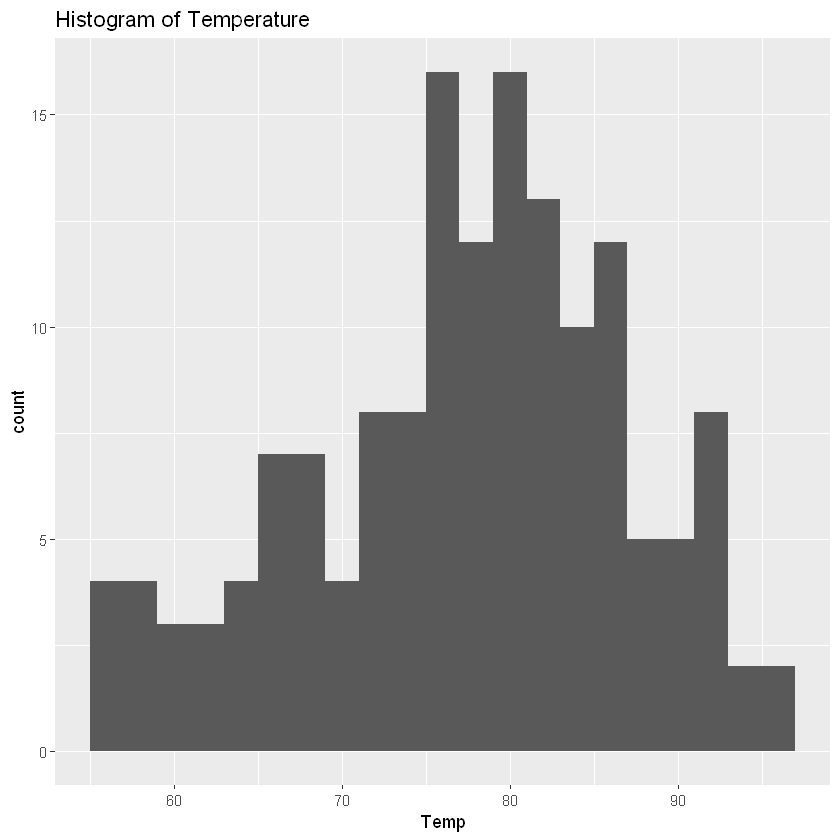

In [32]:
ggplot(mtcars, aes(x = mpg)) + geom_histogram(binwidth = 2) + ggtitle("Histogram of Miles Per Gallon")

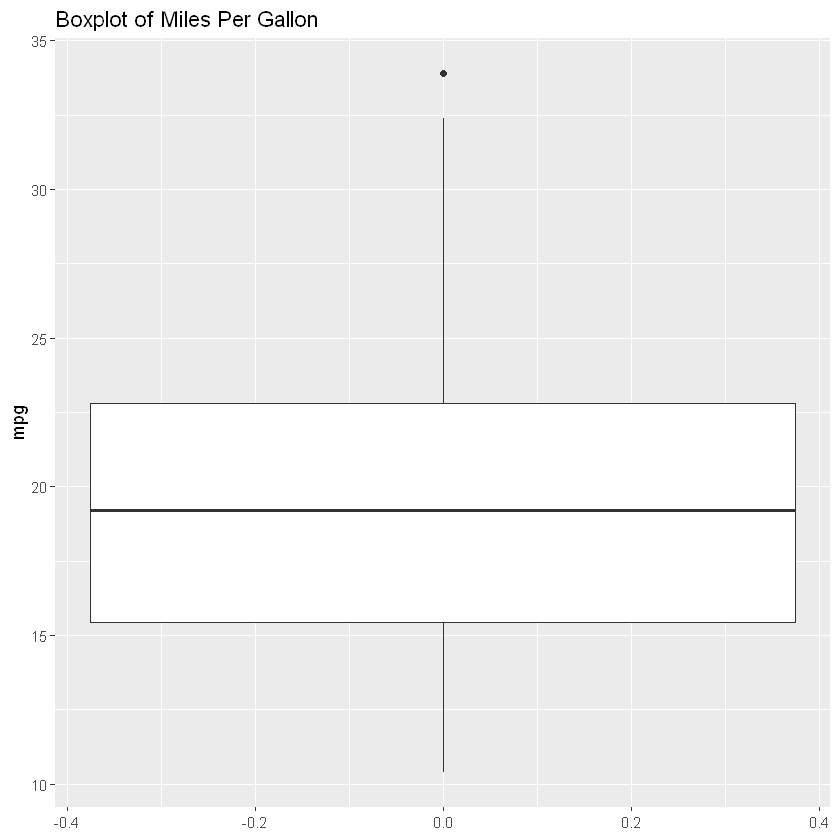

In [33]:
ggplot(mtcars, aes(y = mpg)) + geom_boxplot() + ggtitle("Boxplot of Miles Per Gallon")

### Categorical variables

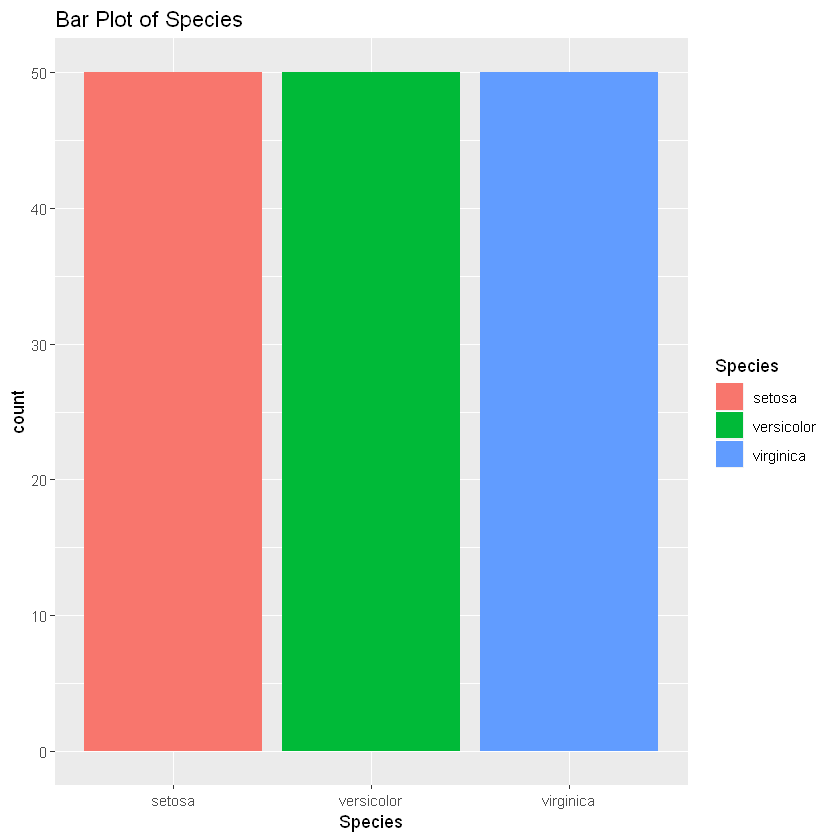

In [50]:
data(iris)
ggplot(iris, aes(x = Species )) + geom_bar(aes(fill = Species)) + ggtitle("Bar Plot of Species")

## Relationship between 2 variables

### Numeric and Numeric

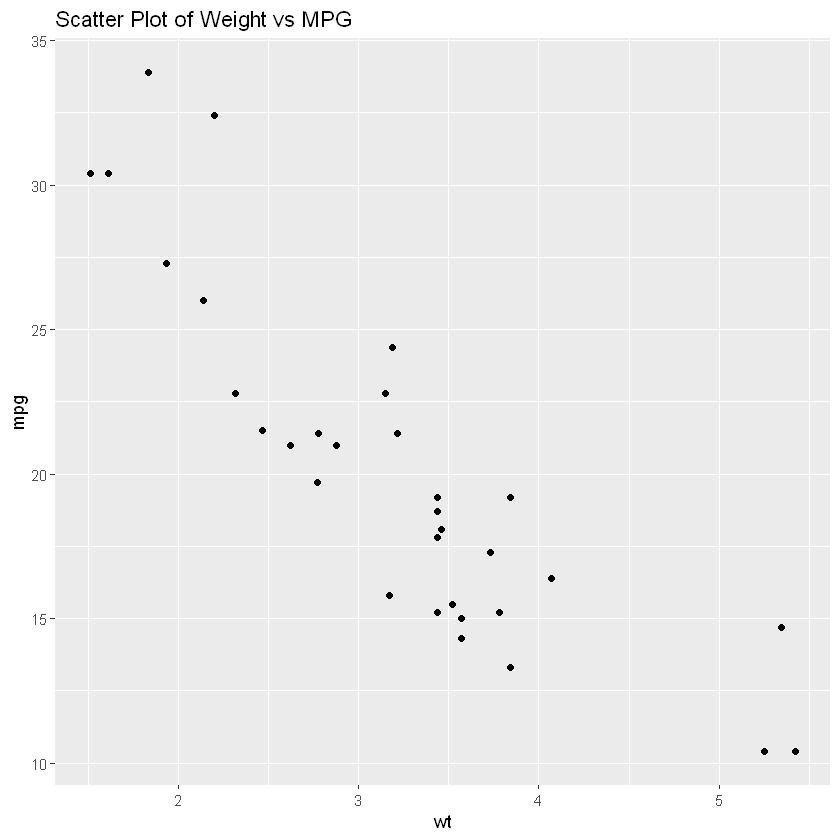

In [52]:
ggplot(mtcars, aes(x = wt, y = mpg)) + geom_point() + ggtitle("Scatter Plot of Weight vs MPG")

### Numeric and Categorical

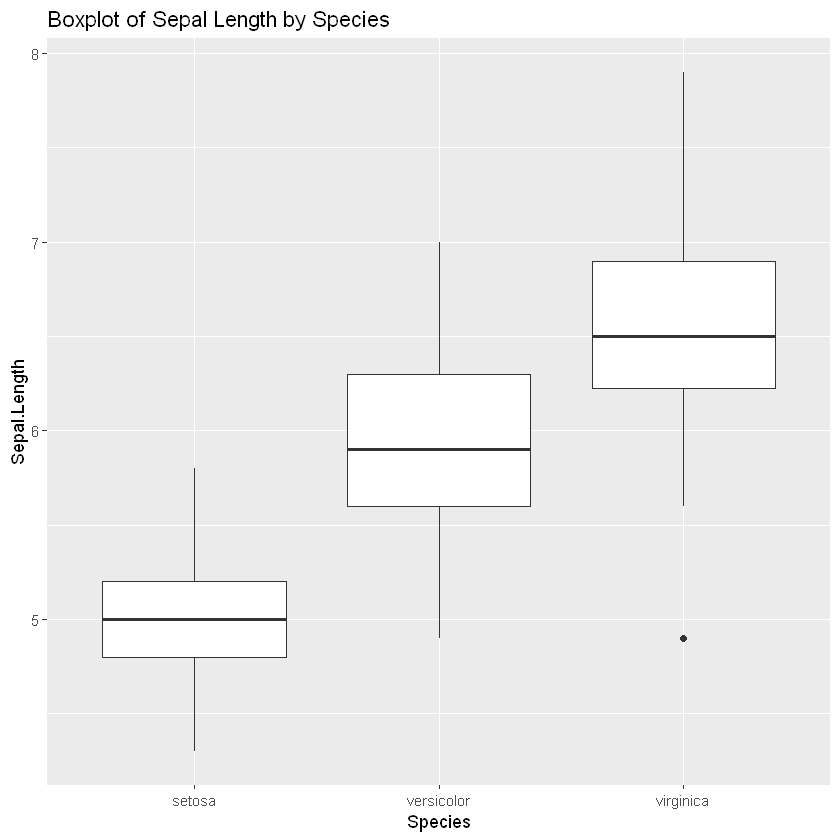

In [41]:
ggplot(iris, aes(x = Species, y = Sepal.Length)) + geom_boxplot() + ggtitle("Boxplot of Sepal Length by Species")

## Relationships among 3 or more variables

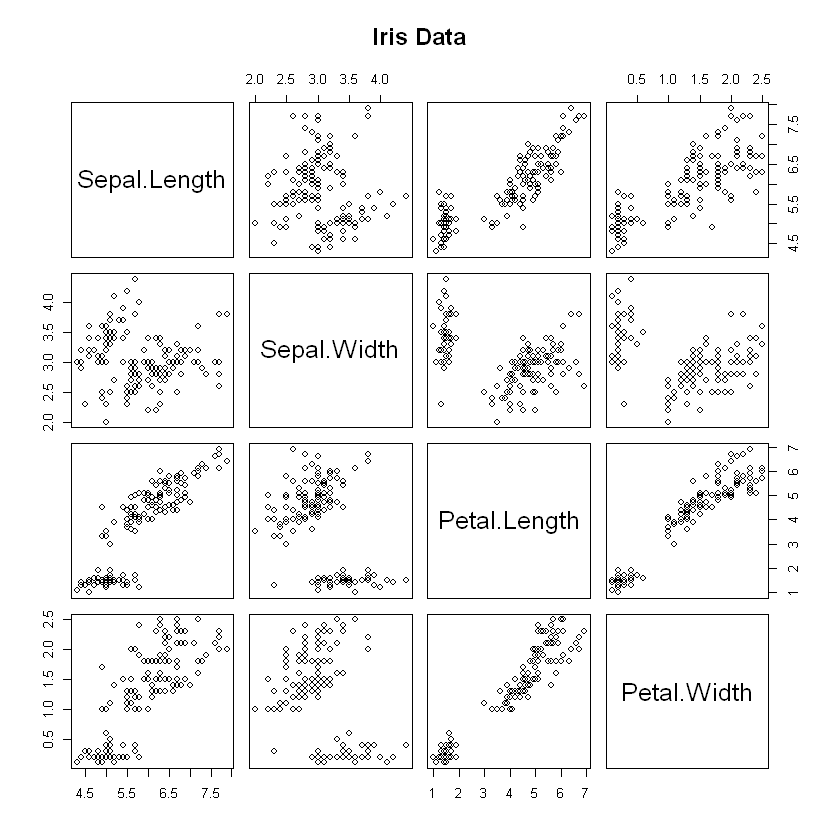

In [45]:
pairs(iris[,1:4], main = "Iris Data")

Warning message:
"unable to access index for repository https://cran.r-project.org/bin/windows/contrib/3.6:
  cannot open URL 'https://cran.r-project.org/bin/windows/contrib/3.6/PACKAGES'"installing the source package 'corrplot'



[1] -0.8676594

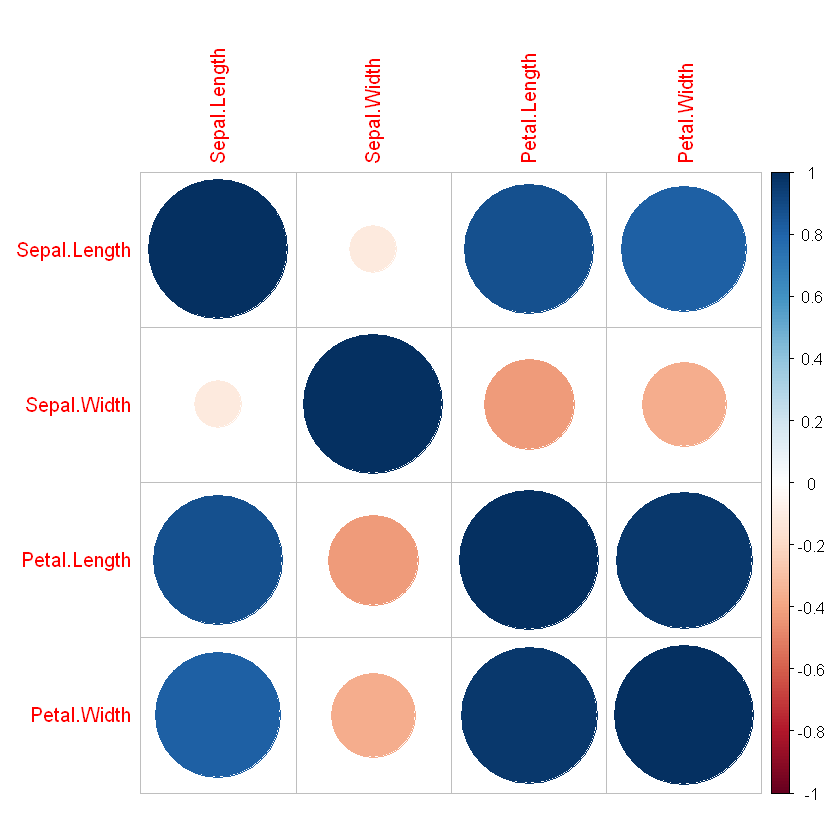

In [54]:
install.packages("corrplot")
library(corrplot)

corrplot(cor(iris[,1:4]), method = "circle")

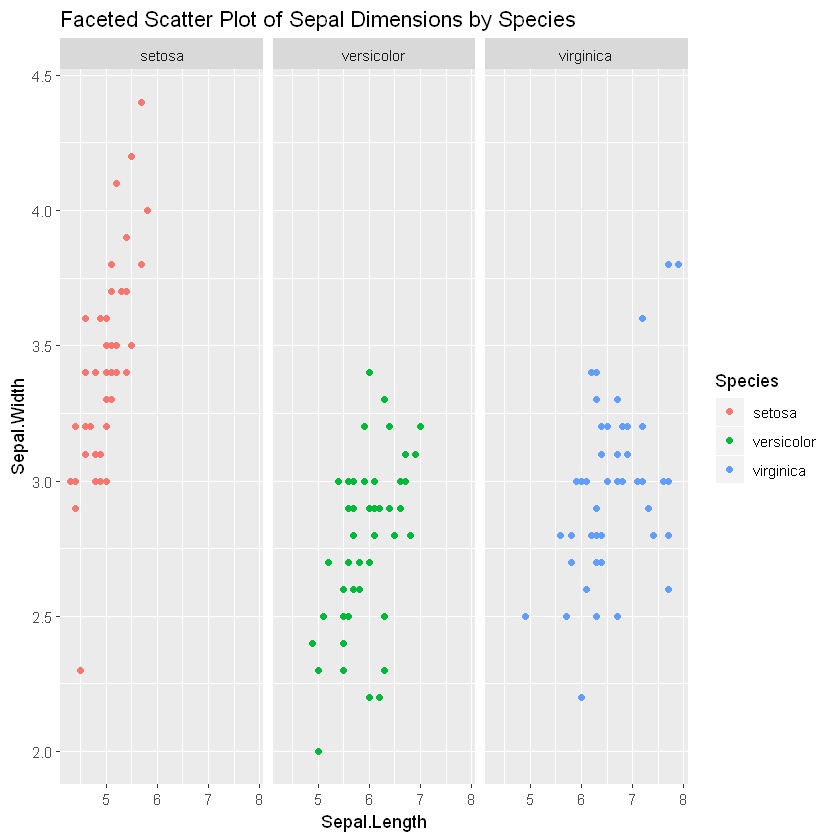

In [46]:
ggplot(iris, aes(x = Sepal.Length, y = Sepal.Width, color = Species)) + geom_point() + facet_wrap(~ Species) + ggtitle("Faceted Scatter Plot of Sepal Dimensions by Species")